In [1]:
import pandas as pd          # for data manipulation
import numpy as np           # for numerical operations
import seaborn as sns        # for beautiful plots
import matplotlib.pyplot as plt  # for basic plotting


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [10]:
df['Age'] = pd.to_numeric(df['Age'],errors = 'coerce')

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df = df.drop(columns='Cabin')


<Axes: xlabel='Survived', ylabel='count'>

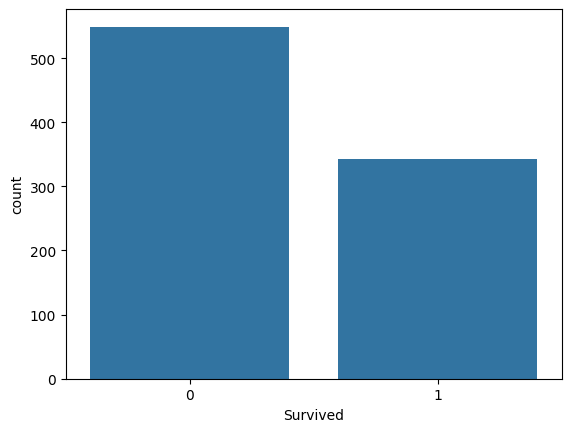

In [15]:
sns.countplot(x = 'Survived' , data = df)

<Axes: xlabel='Pclass', ylabel='count'>

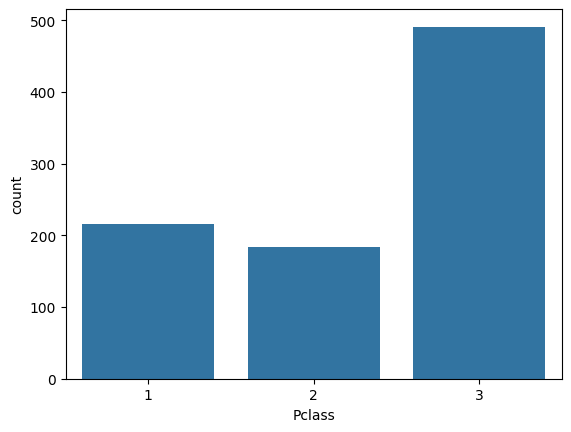

In [16]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Fare', ylabel='Count'>

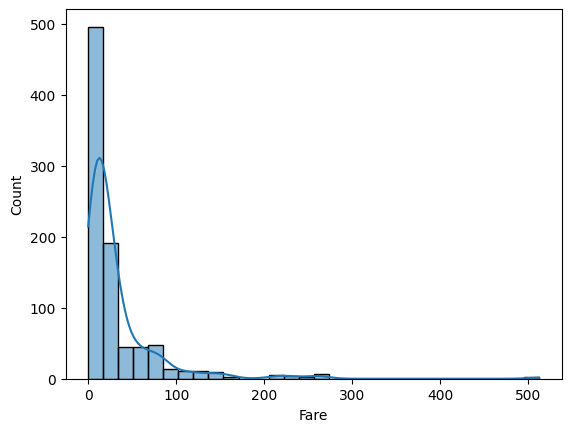

In [17]:
sns.histplot(df['Fare'] , bins = 30 , kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

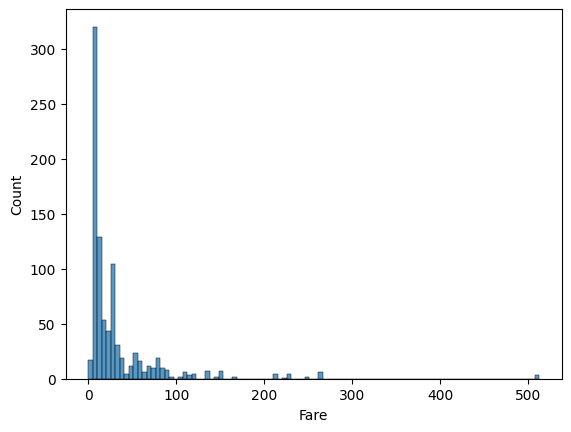

In [18]:
sns.histplot(df['Fare'], bins=100)


<Axes: xlabel='Sex', ylabel='count'>

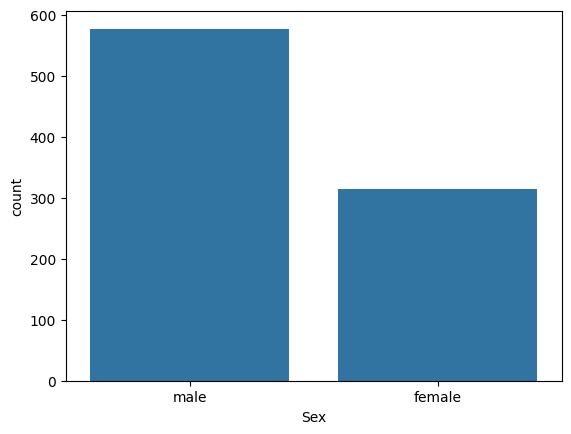

In [23]:
sns.countplot(x='Sex', data=df)


In [24]:
df['Embarked'].value_counts()


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

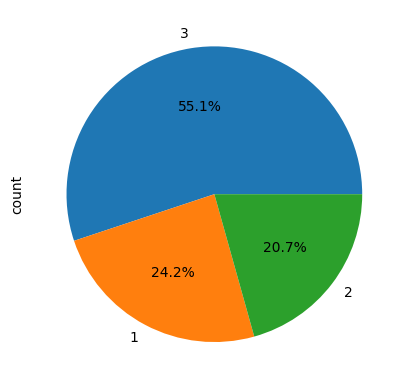

In [25]:
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%')


In [26]:
df['Pclass'].value_counts(normalize=True)


Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

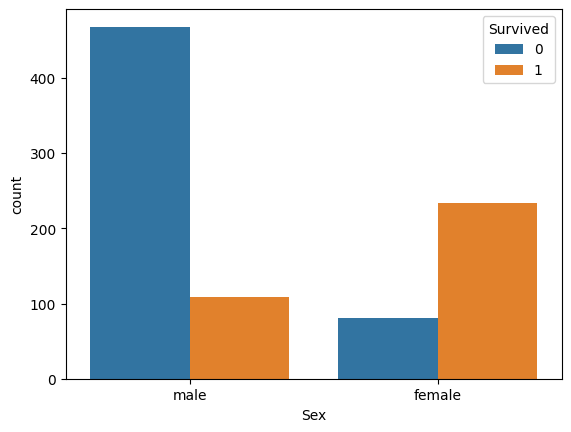

In [27]:
sns.countplot(x='Sex', hue='Survived', data=df)


<Axes: xlabel='Pclass', ylabel='Survived'>

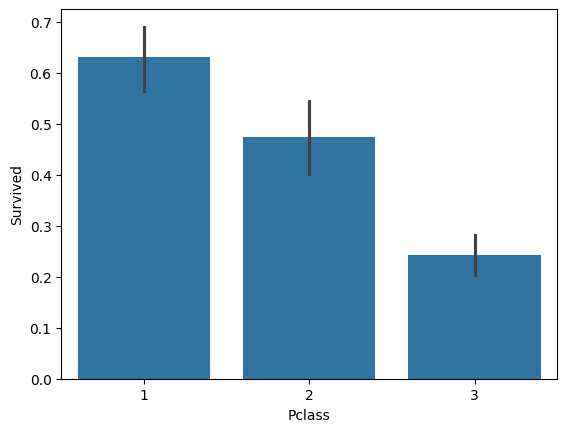

In [28]:
sns.barplot(x='Pclass', y='Survived', data=df)


<Axes: >

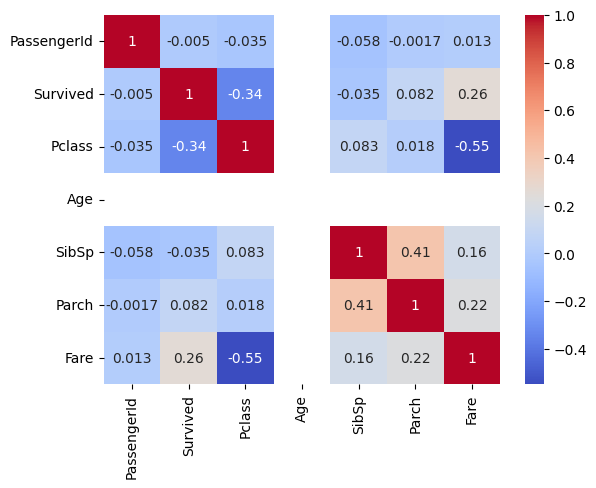

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [32]:
#Title Extraction from Name - People's titles (Mr., Miss, etc.) can reveal social status or age/gender hints
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)


In [33]:
df.Title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [34]:
#IsAlone Feature - Whether the passenger was traveling alone or with familydf['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlong'] = (df['FamilySize'] == 0).astype(int)

In [35]:
df.FamilySize
df.IsAlong

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlong, Length: 891, dtype: int64

In [36]:
df.FamilySize

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [38]:
#Age Binning(Age Groups) - Convert continuous age into categories
df['AgeGroup'] = pd.cut(df['Age'] , bins = [0,12,18,35,60,80] , labels = ['Child','Teen','YoungAdult','Adult','Senior'])

In [39]:
df.AgeGroup


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: AgeGroup, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'YoungAdult' < 'Adult' < 'Senior']

In [40]:
#Fare Binning - create fare categories
df['FareGroup'] = pd.qcut(df['Fare'] , 4 , labels = ['Low','Mid','High','Very High'])

In [41]:
#Family Category - Group people based on family size
df['FamilyCategory'] = pd.cut(df['FamilySize'], bins=[-1, 0, 3, 6, 20], labels=['Alone', 'Small', 'Medium', 'Large'])


In [42]:
df['Fare_per_Person'] = df['Fare'] / (df['FamilySize'] + 1)


In [43]:
print(df.head())
print(df.columns)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  NaN      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  NaN      1   
2                             Heikkinen, Miss. Laina  female  NaN      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  NaN      1   
4                           Allen, Mr. William Henry    male  NaN      0   

   Parch            Ticket     Fare Embarked Title  FamilySize  IsAlong  \
0      0         A/5 21171   7.2500        S    Mr           1        0   
1      0          PC 17599  71.2833        C   Mrs           1        0   
2      0  STON/O2. 3101282   7.9250        S  Miss           0        1   
3      0            113803